In [2]:
#import all important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import fetch_openml
%matplotlib inline

In [4]:
#loading dataset
mnist = fetch_openml('mnist_784')

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
#saving features and labels differently
X=mnist['data']
Y=mnist['target']

In [6]:
#changing strings to integer
Y=Y.astype(int)

In [7]:
#splitting data in 80-20 ratio
X_train,X_test=X[:5600],X[5600:]
Y_train,Y_test=Y[:5600],Y[5600:]

In [8]:
#function to plot digit
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=plt.cm.Blues, interpolation='nearest')
    plt.axis('off')

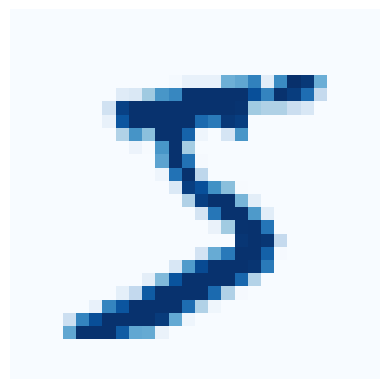

In [9]:
#plotting a random digit
plot_digit(X_train.iloc[0].values)

In [63]:
#importing classifiers we gonna train
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [86]:
#for evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
#for fine-tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [22]:
#for getting reports
def class_report(y, y_preds):
    print("\nClassification report:\n\n",
          classification_report(y, y_preds, digits=6))

In [23]:
#plot confusion matrix
def plot_cm(cm):
    cm_fig, cm_ax = plt.subplots(figsize=(10, 10))
    cf_mat_disp = ConfusionMatrixDisplay(cm)
    cf_mat_disp.plot(ax=cm_ax, cmap=plt.cm.Blues)
    plt.show()

## K-Neighbours classifier

In [27]:
knn = KNeighborsClassifier()

In [28]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

### Metrics evaluation:

In [30]:
#training data cross evaluation
training_pred_knn=cross_val_predict(knn,X_train,Y_train,cv=3)

In [33]:
cm_knn=confusion_matrix(Y_train,training_pred_knn)

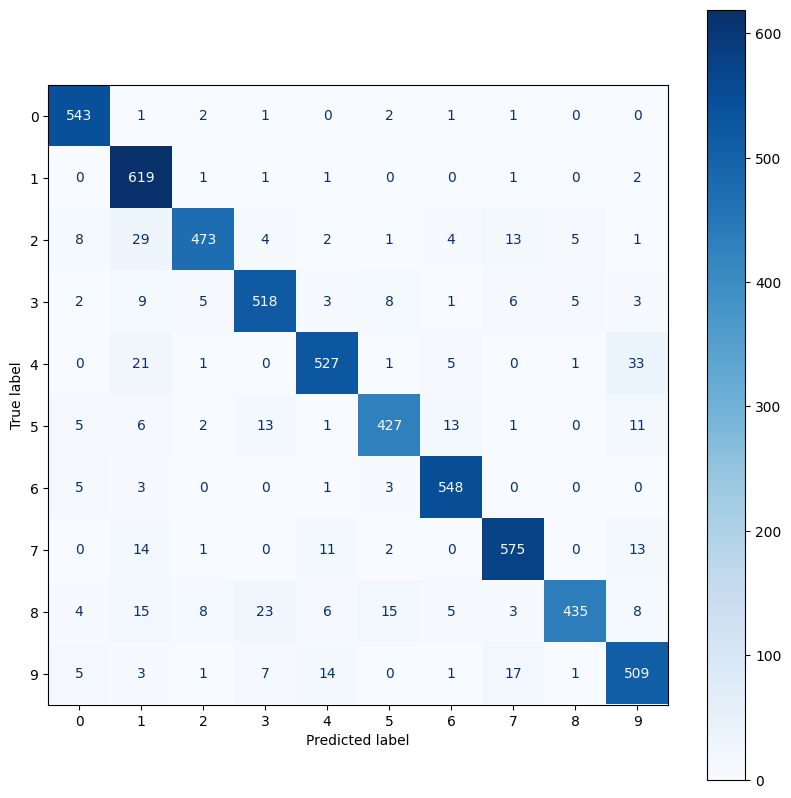

In [34]:
plot_cm(cm_knn)

In [36]:
class_report(Y_train, training_pred_knn)


Classification report:

               precision    recall  f1-score   support

           0   0.949301  0.985481  0.967053       551
           1   0.859722  0.990400  0.920446       625
           2   0.957490  0.875926  0.914894       540
           3   0.913580  0.925000  0.919255       560
           4   0.931095  0.894737  0.912554       589
           5   0.930283  0.891441  0.910448       479
           6   0.948097  0.978571  0.963093       560
           7   0.931929  0.933442  0.932685       616
           8   0.973154  0.833333  0.897833       522
           9   0.877586  0.912186  0.894552       558

    accuracy                       0.923929      5600
   macro avg   0.927224  0.922052  0.923281      5600
weighted avg   0.926026  0.923929  0.923615      5600



Given model give 92% accuracy <br>
best precision is 97% at 83% recall <br>
best recall is 98% at 94% precision <br>
best f1 score is 96% at 98% recall and 94% precision

In [38]:
#testing on test data
y_test_preds_knn = knn.predict(X_test)

In [39]:
class_report(Y_test, y_test_preds_knn)


Classification report:

               precision    recall  f1-score   support

           0   0.944899  0.982683  0.963420      6352
           1   0.890662  0.992967  0.939036      7252
           2   0.965580  0.904651  0.934123      6450
           3   0.929392  0.922048  0.925706      6581
           4   0.943486  0.921091  0.932154      6235
           5   0.927285  0.909325  0.918217      5834
           6   0.952292  0.973401  0.962731      6316
           7   0.935127  0.936948  0.936037      6677
           8   0.966163  0.842615  0.900169      6303
           9   0.883637  0.923125  0.902950      6400

    accuracy                       0.931941     64400
   macro avg   0.933852  0.930885  0.931454     64400
weighted avg   0.933251  0.931941  0.931657     64400



Given model give 93% accuracy <br>
best precision is 96% at 84% recall <br>
best recall is 98% at 94% precision <br>
best f1 score is 96% at 98% recall and 94% precision

### Fine tuning our model:

In [40]:
#gonna run grid search
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5,6,7,8]}]

In [41]:
knn_clf = KNeighborsClassifier()

In [42]:
grid_search_knn = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)

In [43]:
grid_search_knn.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 4, 5, 6, 7, 8],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [45]:
knn_best_clf=grid_search_knn.best_estimator_

In [46]:
knn_best_clf.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [47]:
training_pred_knn_best=cross_val_predict(knn_best_clf,X_train,Y_train,cv=3)

In [49]:
cm_best=confusion_matrix(Y_train,training_pred_knn_best)

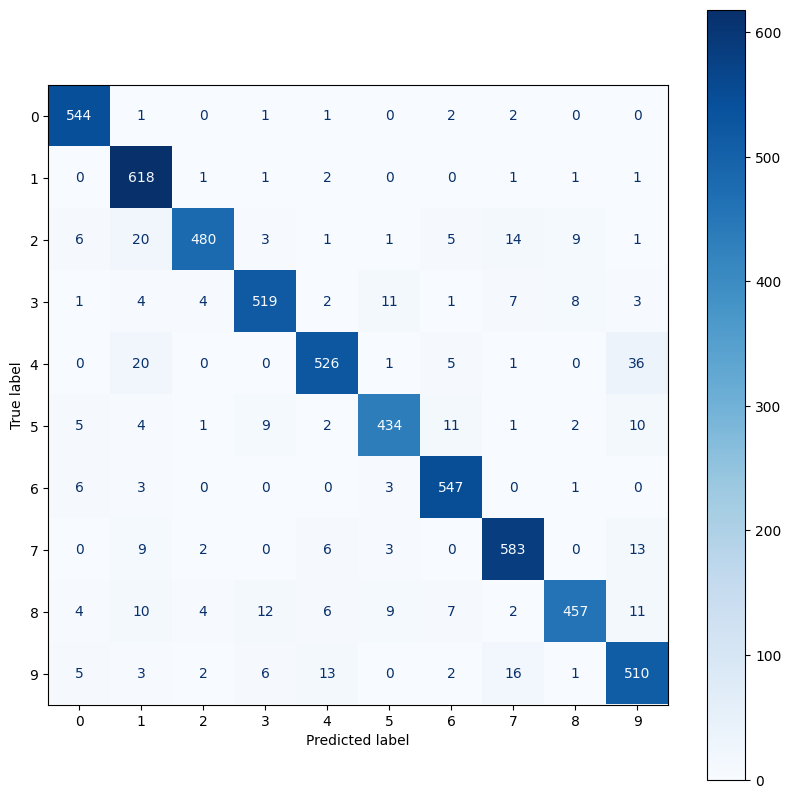

In [50]:
plot_cm(cm_best)

In [51]:
class_report(Y_train, training_pred_knn_best)


Classification report:

               precision    recall  f1-score   support

           0   0.952715  0.987296  0.969697       551
           1   0.893064  0.988800  0.938497       625
           2   0.971660  0.888889  0.928433       540
           3   0.941924  0.926786  0.934293       560
           4   0.940966  0.893039  0.916376       589
           5   0.939394  0.906054  0.922423       479
           6   0.943103  0.976786  0.959649       560
           7   0.929825  0.946429  0.938053       616
           8   0.954071  0.875479  0.913087       522
           9   0.871795  0.913978  0.892388       558

    accuracy                       0.931786      5600
   macro avg   0.933852  0.930354  0.931290      5600
weighted avg   0.933014  0.931786  0.931578      5600



Given model give 93.17% accuracy <br>
best precision is 97% at 88% recall <br>
best recall is 98% at 95% precision <br>
best f1 score is 96% at 98% recall and 95% precision

In [52]:
test_pred_knn_best=knn_best_clf.predict(X_test)

In [53]:
class_report(Y_test,test_pred_knn_best)


Classification report:

               precision    recall  f1-score   support

           0   0.958795  0.981738  0.970131      6352
           1   0.913375  0.991589  0.950876      7252
           2   0.969147  0.910698  0.939014      6450
           3   0.936439  0.922352  0.929342      6581
           4   0.951276  0.926864  0.938911      6235
           5   0.929553  0.916010  0.922732      5834
           6   0.954609  0.978942  0.966622      6316
           7   0.935028  0.941890  0.938447      6677
           8   0.963800  0.865937  0.912251      6303
           9   0.880118  0.933750  0.906141      6400

    accuracy                       0.937888     64400
   macro avg   0.939214  0.936977  0.937447     64400
weighted avg   0.938852  0.937888  0.937708     64400



Given model give 93.78% accuracy <br>
best precision is 96.91% at 91% recall <br>
best recall is 98% at 95% precision <br>
best f1 score is 97% at 98% recall and 95% precision

## Logistic Regression

In [73]:
#did this to put each pixel between range of 0 to 1
X_train=X_train/255.0
X_test=X_test/255.0

In [74]:
log_reg = LogisticRegression(max_iter=1000,solver='lbfgs', multi_class='multinomial')

In [75]:
log_reg.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

### evaluation metrices

In [76]:
training_pred_logistic=cross_val_predict(log_reg,X_train,Y_train,cv=3)

In [77]:
cm_logistic=confusion_matrix(Y_train,training_pred_logistic)

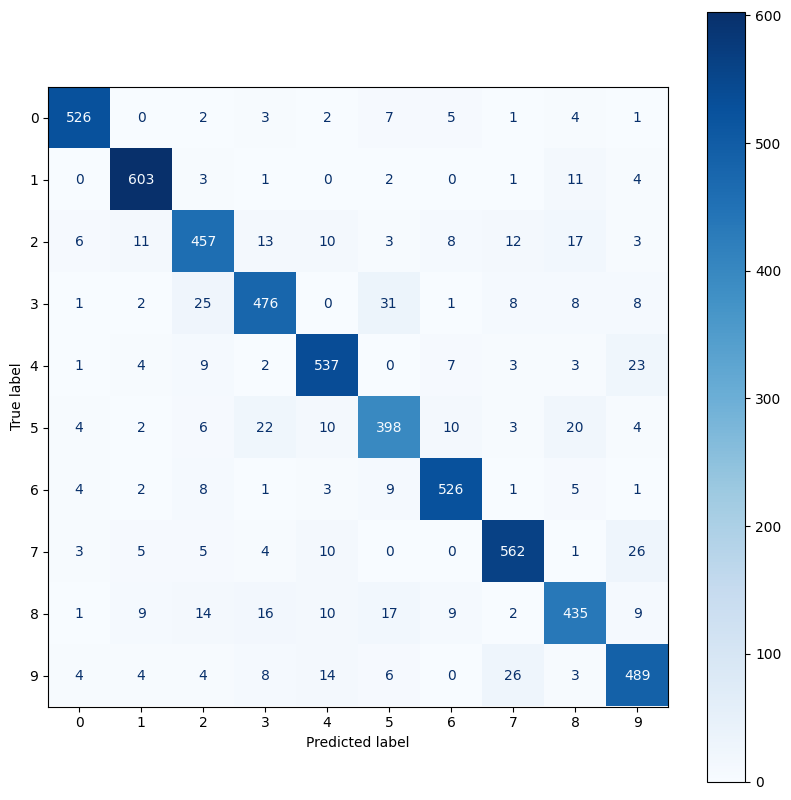

In [78]:
plot_cm(cm_logistic)

In [79]:
class_report(Y_train,training_pred_logistic)


Classification report:

               precision    recall  f1-score   support

           0   0.956364  0.954628  0.955495       551
           1   0.939252  0.964800  0.951855       625
           2   0.857411  0.846296  0.851817       540
           3   0.871795  0.850000  0.860759       560
           4   0.901007  0.911715  0.906329       589
           5   0.841438  0.830898  0.836134       479
           6   0.929329  0.939286  0.934281       560
           7   0.907916  0.912338  0.910121       616
           8   0.857988  0.833333  0.845481       522
           9   0.860915  0.876344  0.868561       558

    accuracy                       0.894464      5600
   macro avg   0.892341  0.891964  0.892083      5600
weighted avg   0.894089  0.894464  0.894207      5600



Given model give 89% accuracy <br>
best precision is 95% at 95% recall <br>
best recall is 96% at 93% precision <br>
best f1 score is 95% at 95% recall and 95% precision

In [80]:
y_test_preds_logistic = log_reg.predict(X_test)

In [81]:
class_report(Y_test,y_test_preds_logistic)


Classification report:

               precision    recall  f1-score   support

           0   0.945377  0.948205  0.946789      6352
           1   0.938189  0.962769  0.950320      7252
           2   0.885209  0.862016  0.873458      6450
           3   0.886195  0.855493  0.870574      6581
           4   0.889219  0.912751  0.900831      6235
           5   0.852163  0.833905  0.842935      5834
           6   0.917917  0.929544  0.923694      6316
           7   0.905047  0.905047  0.905047      6677
           8   0.841714  0.825956  0.833760      6303
           9   0.849529  0.874219  0.861697      6400

    accuracy                       0.892329     64400
   macro avg   0.891056  0.890990  0.890911     64400
weighted avg   0.892067  0.892329  0.892085     64400



Given model give 89% accuracy <br>
best precision is 94% at 94% recall <br>
best recall is 96% at 93% precision <br>
best f1 score is 95% at 96% recall and 93% precision

### finetuning model:

In [92]:
param_grid = {
    'C': [ 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers
    'class_weight': [None, 'balanced']  # Class weights
}

In [93]:
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial')

In [94]:
random_search_logistic = RandomizedSearchCV(log_reg, param_grid, n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)


In [95]:
random_search_logistic.fit(X_train, Y_train)


C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(max_iter=1000,
                                                multi_class='multinomial'),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100],
                                        'class_weight': [None, 'balanced'],
                                        'solver': ['liblinear', 'lbfgs']},
                   random_state=42, scoring='accuracy')

In [97]:
log_reg_best=random_search_logistic.best_estimator_

In [98]:
log_reg_best.fit(X_train,Y_train)

LogisticRegression(C=1, max_iter=1000, multi_class='multinomial')

In [99]:
training_pred_logistic_best=cross_val_predict(log_reg_best,X_train,Y_train,cv=3)

In [100]:
cm_logistic_best=confusion_matrix(Y_train,training_pred_logistic_best)

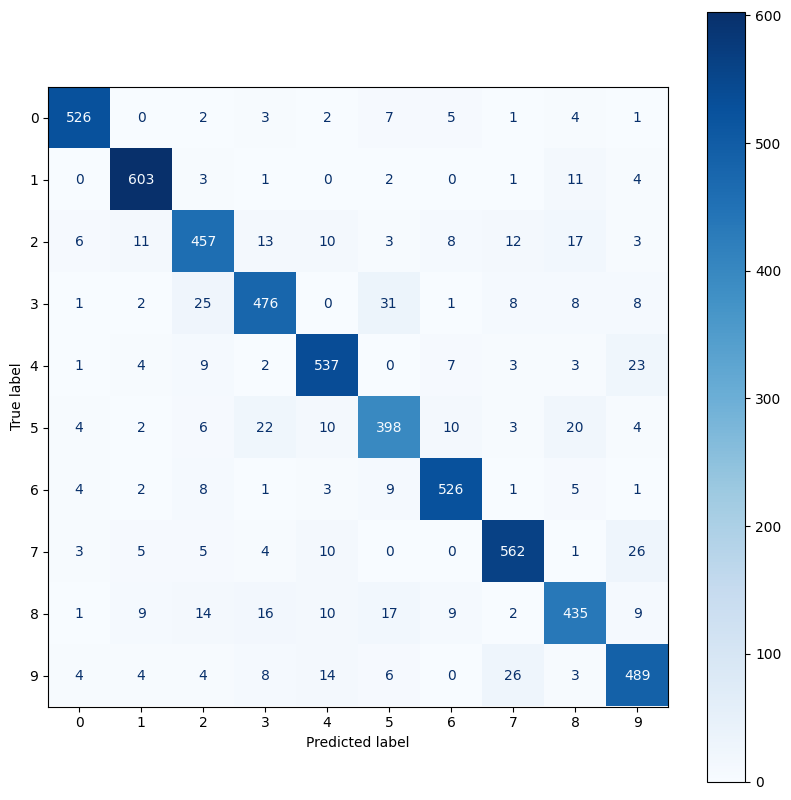

In [101]:
plot_cm(cm_logistic_best)

In [102]:
class_report(Y_train,training_pred_logistic_best)


Classification report:

               precision    recall  f1-score   support

           0   0.956364  0.954628  0.955495       551
           1   0.939252  0.964800  0.951855       625
           2   0.857411  0.846296  0.851817       540
           3   0.871795  0.850000  0.860759       560
           4   0.901007  0.911715  0.906329       589
           5   0.841438  0.830898  0.836134       479
           6   0.929329  0.939286  0.934281       560
           7   0.907916  0.912338  0.910121       616
           8   0.857988  0.833333  0.845481       522
           9   0.860915  0.876344  0.868561       558

    accuracy                       0.894464      5600
   macro avg   0.892341  0.891964  0.892083      5600
weighted avg   0.894089  0.894464  0.894207      5600



In [103]:
test_pred_logistic_best=log_reg_best.predict(X_test)

In [104]:
class_report(Y_test,test_pred_logistic_best)


Classification report:

               precision    recall  f1-score   support

           0   0.945377  0.948205  0.946789      6352
           1   0.938189  0.962769  0.950320      7252
           2   0.885209  0.862016  0.873458      6450
           3   0.886195  0.855493  0.870574      6581
           4   0.889219  0.912751  0.900831      6235
           5   0.852163  0.833905  0.842935      5834
           6   0.917917  0.929544  0.923694      6316
           7   0.905047  0.905047  0.905047      6677
           8   0.841714  0.825956  0.833760      6303
           9   0.849529  0.874219  0.861697      6400

    accuracy                       0.892329     64400
   macro avg   0.891056  0.890990  0.890911     64400
weighted avg   0.892067  0.892329  0.892085     64400

